## Analysing the correlation between the purity of the drugs and the total deaths

We will analyse the purity of the drugs in EU and see the difference the purity of a drug makes on the total number of overdose deaths. The purity of the drug has effect on the deaths because, often times the purity of the drug changes and is not taken into account and that is how many people die. Thats the way Janis Joplin died.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.stats import t as student
from scipy.stats import beta
from scipy.stats import multivariate_normal as mvn 
from scipy import stats

In [2]:
dMale = pd.read_excel('./tables/drugDeaths/maleDeaths.xlsx')
dFemale = pd.read_excel('./tables/drugDeaths/femaleDeaths.xlsx')
pCannabis = pd.read_excel('./tables/pricePurity/purityCannabisMean.xlsx')
pBrownheroin = pd.read_excel('./tables/pricePurity/purityBrownHeroinMean.xlsx')
pCocaine = pd.read_excel('./tables/pricePurity/purityCocaineMean.xlsx')
pEctasy = pd.read_excel('./tables/pricePurity/purityEctasyMean.xlsx')
pWhiteHeroin = pd.read_excel('./tables/pricePurity/purityWhiteHeroinMean.xlsx')

In [3]:
Deaths = dMale + dFemale
Deaths = Deaths.drop('Country', axis=1).drop('Unnamed: 24', axis=1)
pCannabis = pCannabis.drop(['Country', 'Study'], axis = 1)
pBrownheroin = pBrownheroin.drop(['Country', 'Study'], axis = 1)
Deaths.drop(Deaths.tail(1).index,inplace=True)

### Cannabis

In [4]:
purityCannabis = pd.DataFrame()
for year in range(1995, 2018):
    purityCannabis = purityCannabis.append({'Year': year, 'CannabisPurity': pCannabis[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityCannabis['Year'] = purityCannabis['Year'].astype(int)    

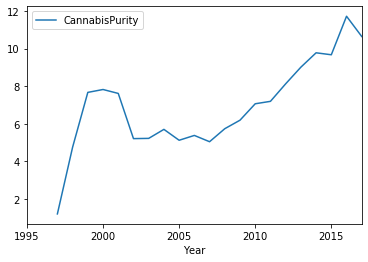

In [5]:
purityCannabis.plot(x='Year', y='CannabisPurity').locator_params(integer=True)

For a non lethal drug we can only say that through the years its purity percentage rose from 1% to 10%.

### Brown Heroin

In [6]:
purityHeroin = pd.DataFrame()
for year in range(1995, 2018):
    purityHeroin = purityHeroin.append({'Year': year, 'brownHeroinPurity': pBrownheroin[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityHeroin['Year'] = purityHeroin['Year'].astype(int)

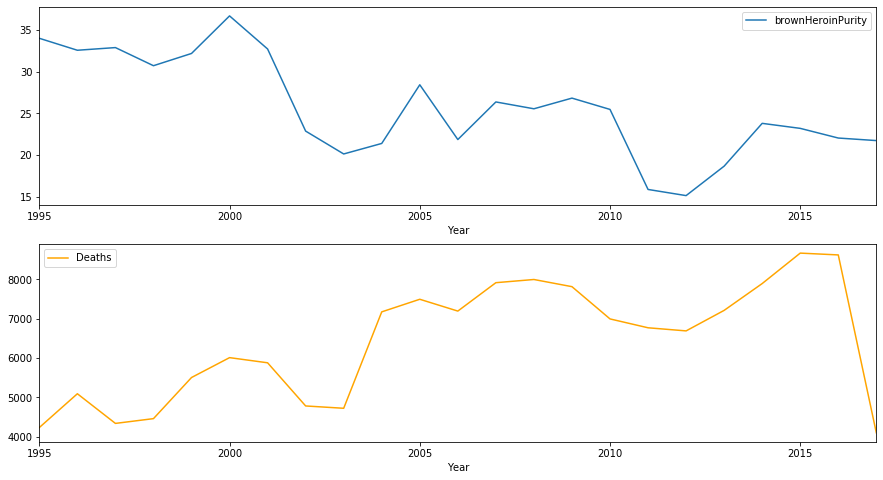

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
purityHeroin.plot(x='Year', y='brownHeroinPurity', ax = axes[0]).locator_params(integer=True)
purityHeroin.plot(x='Year',y='Deaths', ax = axes[1], color='orange').locator_params(integer=True)

In [8]:
pBrownheroin.drop(pBrownheroin.tail(4).index,inplace=True)

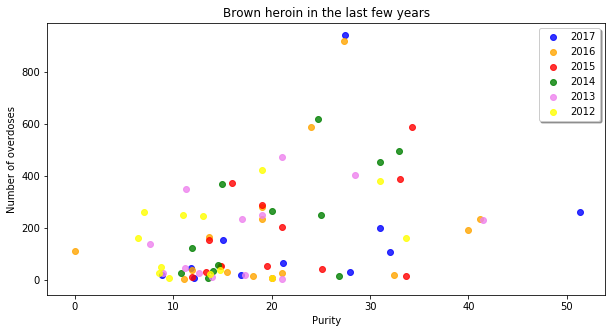

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(pBrownheroin[2017], Deaths[2017], c= 'blue', label = '2017', alpha = 0.8)
plt.scatter(pBrownheroin[2016], Deaths[2016], c= 'orange', label = '2016', alpha = 0.8)
plt.scatter(pBrownheroin[2015], Deaths[2015], c= 'red', label = '2015', alpha = 0.8)
plt.scatter(pBrownheroin[2014], Deaths[2014], c= 'green', label = '2014', alpha = 0.8)
plt.scatter(pBrownheroin[2013], Deaths[2013], c= 'violet', label = '2013', alpha = 0.8)
plt.scatter(pBrownheroin[2012], Deaths[2012], c= 'yellow', label = '2012', alpha = 0.8)
plt.xlabel("Purity",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("Brown heroin in the last few years")
plt.legend(loc="best",shadow=True)

From the brown heroin purity we can only see a relevant differnence in the year 2000, where purity really rose up and the total deaths spiked. We can see a resemblance through the other years.

### White Heroin

In [10]:
purityWhiteHeroin = pd.DataFrame()
for year in range(1995, 2018):
    purityWhiteHeroin = purityWhiteHeroin.append({'Year': year, 'whiteHeroinPurity': pWhiteHeroin[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityWhiteHeroin['Year'] = purityWhiteHeroin['Year'].astype(int)

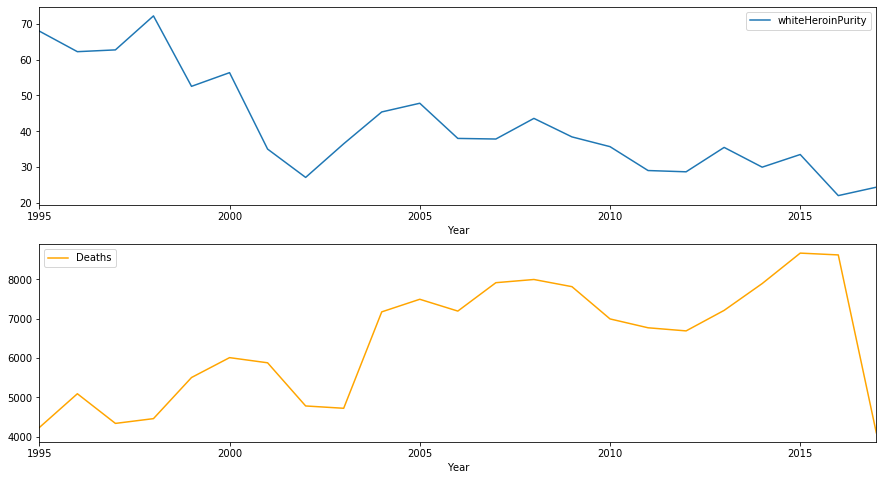

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
purityWhiteHeroin.plot(x='Year', y='whiteHeroinPurity', ax = axes[0]).locator_params(integer=True)
purityWhiteHeroin.plot(x='Year',y='Deaths', ax = axes[1], color='orange').locator_params(integer=True)

For white heroin we can see the spike around 2005.

In [12]:
pWhiteHeroin.drop(pWhiteHeroin.tail(2).index,inplace=True)

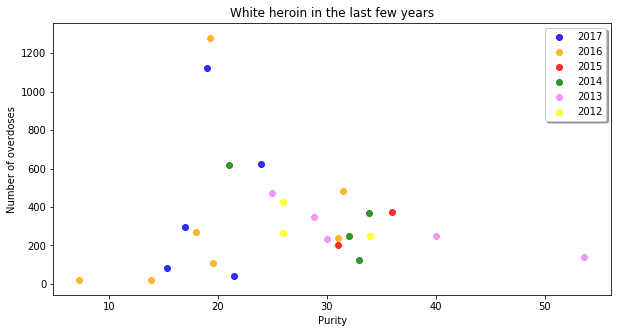

In [13]:

plt.figure(figsize=(10,5))

plt.scatter(pWhiteHeroin[2017], Deaths[2017], c= 'blue', label = '2017', alpha = 0.8)
plt.scatter(pWhiteHeroin[2016], Deaths[2016], c= 'orange', label = '2016', alpha = 0.8)
plt.scatter(pWhiteHeroin[2015], Deaths[2015], c= 'red', label = '2015', alpha = 0.8)
plt.scatter(pWhiteHeroin[2014], Deaths[2014], c= 'green', label = '2014', alpha = 0.8)
plt.scatter(pWhiteHeroin[2013], Deaths[2013], c= 'violet', label = '2013', alpha = 0.8)
plt.scatter(pWhiteHeroin[2012], Deaths[2012], c= 'yellow', label = '2012', alpha = 0.8)

plt.xlabel("Purity",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("White heroin in the last few years")
plt.legend(loc="best",shadow=True)

### Cocaine

In [14]:
purityCocaine = pd.DataFrame()
for year in range(1995, 2018):
    purityCocaine = purityCocaine.append({'Year': year, 'cocainePurity': pCocaine[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityCocaine['Year'] = purityCocaine['Year'].astype(int)

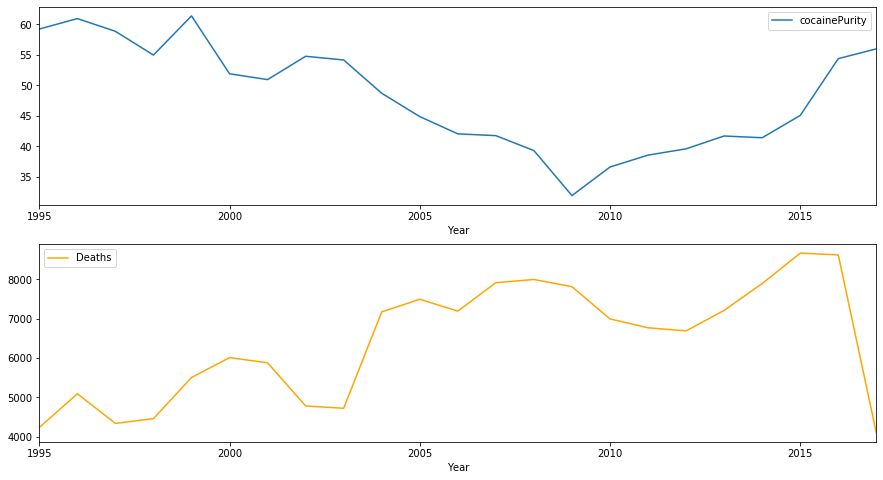

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
purityCocaine.plot(x='Year', y='cocainePurity', ax = axes[0]).locator_params(integer=True)
purityCocaine.plot(x='Year',y='Deaths', ax = axes[1], color='orange').locator_params(integer=True)

In [16]:
pCocaine.drop(pCocaine.tail(4).index,inplace=True)

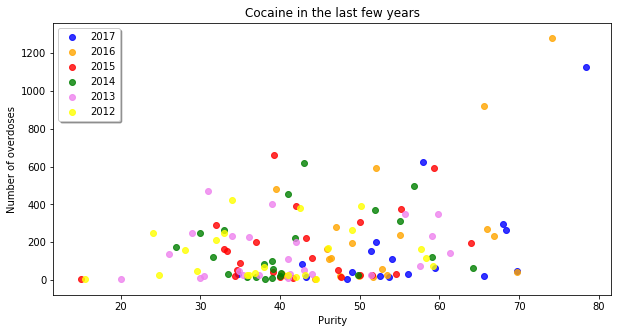

In [17]:
plt.figure(figsize=(10,5))

plt.scatter(pCocaine[2017], Deaths[2017], c= 'blue', label = '2017', alpha = 0.8)
plt.scatter(pCocaine[2016], Deaths[2016], c= 'orange', label = '2016', alpha = 0.8)
plt.scatter(pCocaine[2015], Deaths[2015], c= 'red', label = '2015', alpha = 0.8)
plt.scatter(pCocaine[2014], Deaths[2014], c= 'green', label = '2014', alpha = 0.8)
plt.scatter(pCocaine[2013], Deaths[2013], c= 'violet', label = '2013', alpha = 0.8)
plt.scatter(pCocaine[2012], Deaths[2012], c= 'yellow', label = '2012', alpha = 0.8)

plt.xlabel("Purity",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("Cocaine in the last few years")
plt.legend(loc="best",shadow=True)

### Ectasy

In [18]:
purityEctasy = pd.DataFrame()
for year in range(1995, 2018):
    purityEctasy = purityEctasy.append({'Year': year, 'ectasyPurity': pEctasy[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityEctasy['Year'] = purityEctasy['Year'].astype(int)

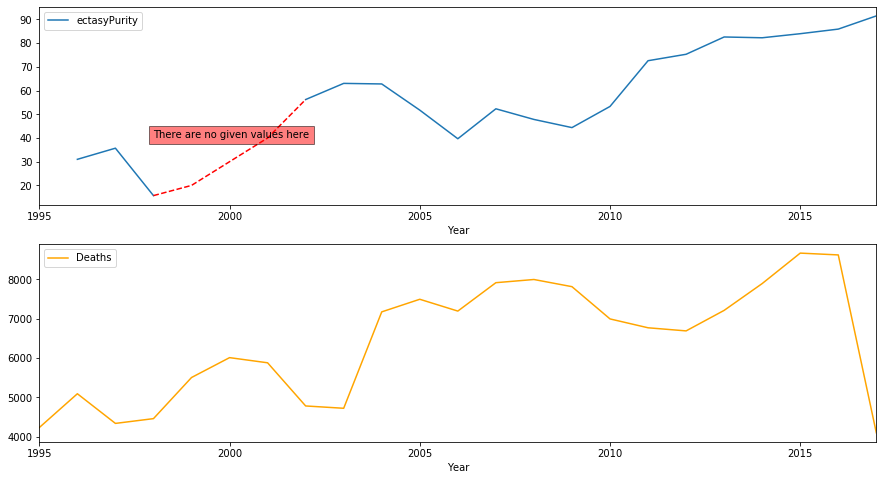

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
purityEctasy.plot(x='Year', y='ectasyPurity', ax = axes[0]).locator_params(integer=True)
vrednosti = [15.7, 20.0, 30.0, 40.0, 56.216667]
axes[0].plot([1998, 1999, 2000, 2001, 2002], vrednosti, '--', color = 'red')
s = 'There are no given values here'
axes[0].text(1998,40.0, s,  bbox=dict(facecolor='red', alpha=0.5))
purityEctasy.plot(x='Year',y='Deaths', ax = axes[1], color='orange').locator_params(integer=True)


The drug Ectasy wasn't popular around 2000, so its purity wasn't changed form 1999 to 2001.

In [20]:
pEctasy.drop(pEctasy.tail(3).index,inplace=True)

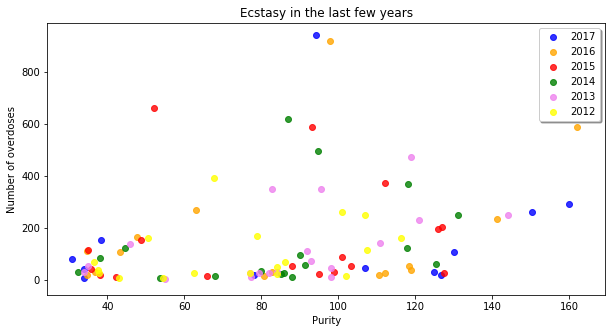

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(pEctasy[2017], Deaths[2017], c= 'blue', label = '2017', alpha = 0.8)
plt.scatter(pEctasy[2016], Deaths[2016], c= 'orange', label = '2016', alpha = 0.8)
plt.scatter(pEctasy[2015], Deaths[2015], c= 'red', label = '2015', alpha = 0.8)
plt.scatter(pEctasy[2014], Deaths[2014], c= 'green', label = '2014', alpha = 0.8)
plt.scatter(pEctasy[2013], Deaths[2013], c= 'violet', label = '2013', alpha = 0.8)
plt.scatter(pEctasy[2012], Deaths[2012], c= 'yellow', label = '2012', alpha = 0.8)
plt.xlabel("Purity",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("Ecstasy in the last few years")
plt.legend(loc="best",shadow=True)

In [22]:
a = []
for year in range(1995, 2018):
    a.append(pBrownheroin[year].dropna().to_list())
a = list(itertools.chain.from_iterable(a))

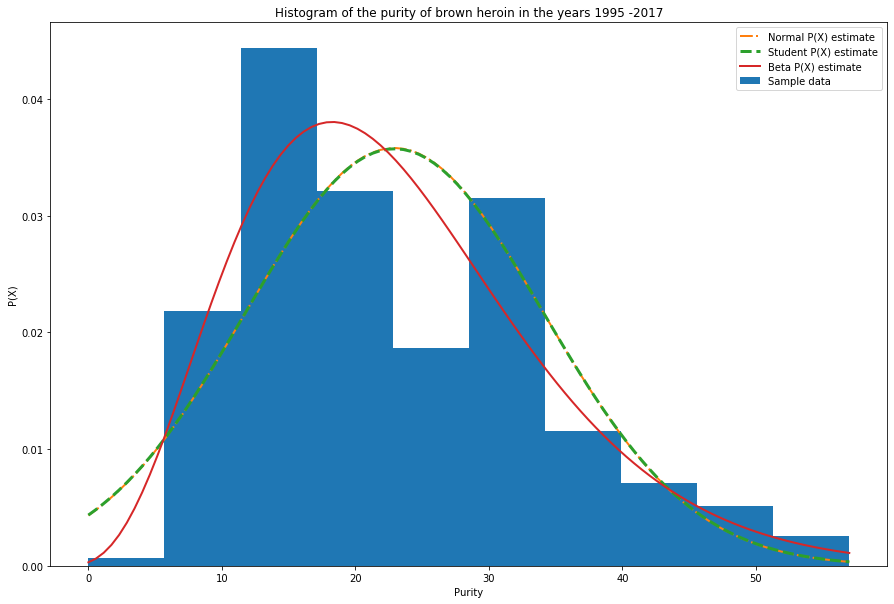

In [23]:
sample= a
xr = np.linspace(min(sample), max(sample), 100)    
n=len(sample)

mu = np.mean(sample)
sigma = (n-1)/n * np.var(sample)
P = [mvn.pdf(x, mu, sigma) for x in xr]

pars_stu = student.fit(sample)
P_stu = [student.pdf(x, *pars_stu) for x in xr ]

pars_beta = beta.fit(sample)
P_beta = [beta.pdf(x, *pars_beta) for x in xr ]

plt.figure(figsize=(15, 10))
plt.hist(sample,    label="Sample data", density=True)
plt.plot(xr, P,     label="Normal P(X) estimate", linewidth=2.0, linestyle = '-.' )
plt.plot(xr, P_stu,     label="Student P(X) estimate", linewidth=3.0, linestyle = '--' )
plt.plot(xr, P_beta,     label="Beta P(X) estimate", linewidth=2.0)
plt.title("Histogram of the purity of brown heroin in the years 1995 -2017")
plt.ylabel("P(X)")
plt.xlabel("Purity")
plt.legend()

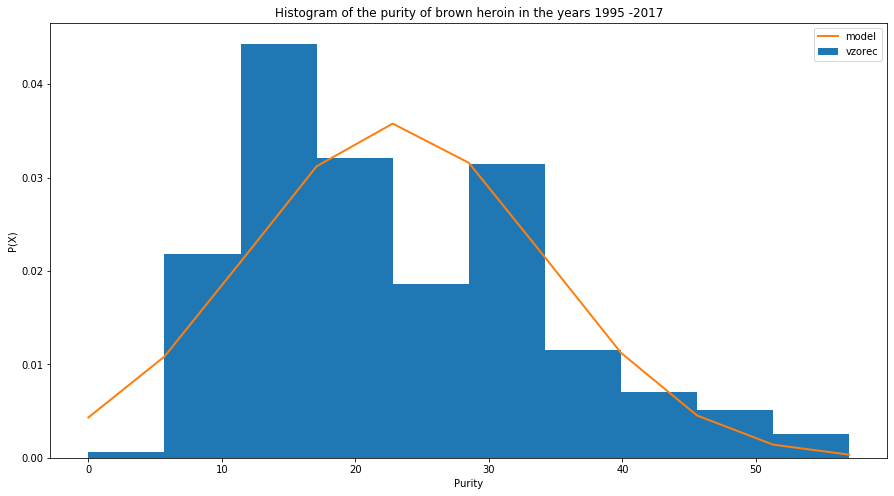

In [24]:
data = a
n=len(data)
mu = np.mean(data)
sigma = (n-1)/n * np.var(data)
plt.figure(figsize=(15, 8))
counts, bins, _ = plt.hist(data, density=True, label="vzorec", bins=10) 

pars_stu = student.fit(data)
P_stu = [student.pdf(x, *pars_stu) for x in xr ]

pars_beta = beta.fit(data)
P_beta = [beta.pdf(x, *pars_beta) for x in xr ]

pdf = [mvn.pdf(x, mu, sigma) for x in bins]   

plt.plot(bins, pdf, "-", label="model", linewidth=2.0)
plt.xlabel("Purity")
plt.ylabel("P(X)")
plt.title("Histogram of the purity of brown heroin in the years 1995 -2017")
plt.legend()

In [25]:
years = [x for x in range (1995, 2018)]
zscores=dict(zip(years, stats.zscore(data)))
def getColor(zVal):
    val=""
    bot10 = stats.norm.ppf(0.1)
    top10 = stats.norm.ppf(1-0.1)
    
    bot30 = stats.norm.ppf(0.25)
    top30 = stats.norm.ppf(1-0.25)

    if zVal > bot10 and zVal < top10:

        if zVal > bot30 and zVal < top30:
            val="MEDIUM"
            return val
        if zVal> bot30:
            val="MEDIUM"
            return val
        val="MEDIUM"
        return val

    if zVal> bot10:
        val="HIGH"
        return val
    val="LOW"
    return val

print("The following years had high purity of brown heroin:")
for i, x in zscores.items():
    #x=getColor(x)
    if getColor(x) is 'HIGH':
        print("Year", i)
    #print("Year",i,"had",x,"purity of brown heroin according to z-score.")


The following years had high purity of brown heroin:
Year 1996
Year 1997
Year 2002
Year 2013
